In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_excel('sleeping health.xlsx')

In [25]:
df.shape

(519, 18)

In [26]:
df.sample(5)

,timestamp,name,age,gender,occupation,sleep(hours),fresh sleep(hours),sleep disorder,stress level,height,weight,blood pressure,heart rate,go to sleep time,wake up time,BMI,BMI.1,Health status
154,2024-05-21 11:01:05.835,NaN,31.0,Male,Doctor,7.6,7.0,NaN,middle,NaN,NaN,NaN,Between 60 and 100,Within 10 p.m,Between 8 am and 10 am,Normal,NaN,healthy
338,2024-05-22 02:06:50.619,NaN,43.0,Male,Engineer,7.8,8.0,NaN,middle,NaN,NaN,High pressure,greater than 100,Within 10 p.m,Between 8 am and 10 am,Normal,NaN,Unhealthy
176,2024-05-21 21:02:09.990,NaN,32.0,Male,Doctor,6,6.0,Insomnia,very high,NaN,NaN,NaN,Less than 60,after 12am,after 10 am,Normal,NaN,Unhealthy
454,2024-05-23 04:37:35.596,NaN,53.0,Female,Engineer,8.5,9.0,NaN,very little,NaN,NaN,NaN,Between 60 and 100,Within 10 p.m,Between 8 am and 10 am,Normal,NaN,healthy
333,2024-05-22 02:03:20.771,NaN,43.0,Male,Engineer,7.8,7.0,Insomnia,very high,NaN,NaN,High pressure,Between 60 and 100,after 12am,after 10 am,Normal,NaN,Unhealthy


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           518 non-null    datetime64[ns]
 1   name                114 non-null    object        
 2   age                 518 non-null    float64       
 3   gender              518 non-null    object        
 4   occupation          518 non-null    object        
 5   sleep(hours)        518 non-null    object        
 6   fresh sleep(hours)  518 non-null    float64       
 7   sleep disorder      110 non-null    object        
 8   stress level        518 non-null    object        
 9   height              128 non-null    float64       
 10  weight              128 non-null    float64       
 11  blood pressure      249 non-null    object        
 12  heart rate          518 non-null    object        
 13  go to sleep time    518 non-null    object        

*   preprocessing
*   EDA
*   Encoding
*   train test split
*   model train
*   accuracy score






In [28]:

df.drop(columns=['timestamp','name','height','weight','BMI.1'],inplace=True)

In [29]:
df.shape

(519, 13)

In [30]:
df.isnull().sum()

age                     1
gender                  1
occupation              1
sleep(hours)            1
fresh sleep(hours)      1
sleep disorder        409
stress level            1
blood pressure        270
heart rate              1
go to sleep time        1
wake up time            1
BMI                     1
Health status           1
dtype: int64

In [31]:
# preprocessing
# handling missing value

In [32]:
# drop one NaN row
df.dropna(subset=['age'],inplace=True)

In [33]:
# to handle missing value of 'sleep disorder' column
df['sleep disorder'].value_counts()

sleep disorder
Insomnia       64
Sleep Apnea    46
Name: count, dtype: int64

In [34]:
df['sleep disorder']=df['sleep disorder'].fillna('none')

In [35]:
# handle missing value for 'blood pressure' column
df['blood pressure']=df['blood pressure'].fillna('unknown')

In [36]:
df.isnull().sum()

age                   0
gender                0
occupation            0
sleep(hours)          0
fresh sleep(hours)    0
sleep disorder        0
stress level          0
blood pressure        0
heart rate            0
go to sleep time      0
wake up time          0
BMI                   0
Health status         0
dtype: int64

In [37]:
# drop duplicate row
print("duplicated row= ",df.duplicated().sum())
df.drop_duplicates(inplace=True)

duplicated row=  70


In [38]:
df.shape

(448, 13)

In [39]:
df.sample(5)

,age,gender,occupation,sleep(hours),fresh sleep(hours),sleep disorder,stress level,blood pressure,heart rate,go to sleep time,wake up time,BMI,Health status
249,38.0,Female,Accountant,7.1,8.0,none,very little,Low pressure,Between 60 and 100,Within 10 p.m,Between 8 am and 10 am,Less weight,healthy
98,50.0,Male,Business,7,8.0,none,middle,High pressure,greater than 100,Within 10 p.m,early morning,Over weight,Unhealthy
335,43.0,Male,Engineer,7.8,8.0,none,middle,High pressure,greater than 100,Within 10 p.m,Between 8 am and 10 am,Normal,Unhealthy
494,58.0,Female,Nurse,8,9.0,Insomnia,very little,High pressure,greater than 100,after 12am,early morning,Over weight,Unhealthy
168,32.0,Male,Engineer,7.5,8.0,none,very little,unknown,Between 60 and 100,Within 12am,Between 8 am and 10 am,Normal,healthy


# Exploratory Data Analysis(EDA)

Text(0, 0.5, 'count')

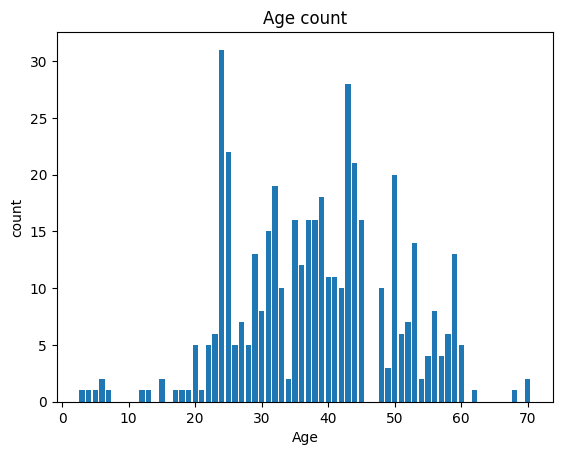

In [40]:
plt.bar(df['age'].value_counts().index,df['age'].value_counts().values)
plt.title('Age count')
plt.xlabel('Age')
plt.ylabel('count')

In [41]:
# total occupation
df['occupation'].nunique()


16

In [42]:
# all types occupation in dataset
occup_counts=df['occupation'].value_counts()
occup_counts

occupation
Student                 82
Nurse                   65
Doctor                  60
Engineer                57
Teacher                 45
Lawyer                  45
Housewife               24
Accountant              24
Sales person            22
Job                      7
Accountant               6
Scientist                5
Retired                  2
Sales representative     2
Business                 1
Manager                  1
Name: count, dtype: int64

In [43]:
# if total person of any occupation is less than 20 than assign others
# Like, df['Manager']='Others' --> df.loc['Manager','Others']

rep=occup_counts[occup_counts<20].index
df['occupation']=df['occupation'].replace(rep,'Others')
df['occupation'].value_counts()

occupation
Student         82
Nurse           65
Doctor          60
Engineer        57
Teacher         45
Lawyer          45
Others          24
Housewife       24
Accountant      24
Sales person    22
Name: count, dtype: int64

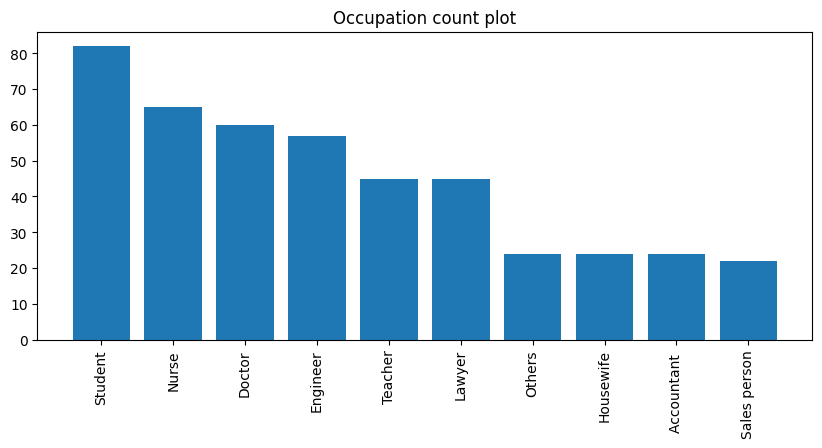

In [44]:
# occupation analysis
plt.figure(figsize=(10,4))
plt.title("Occupation count plot")
plt.bar(df['occupation'].value_counts().index,df['occupation'].value_counts().values)
plt.xticks(df['occupation'].value_counts().index,rotation='vertical')
plt.show()

In [45]:
df['Health status'].value_counts()

Health status
Unhealthy    280
healthy      168
Name: count, dtype: int64

[Text(0, 0, '280'), Text(0, 0, '168')]

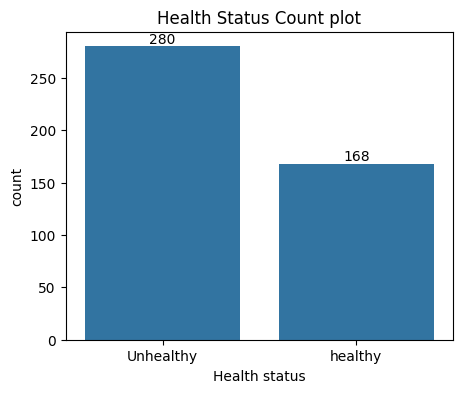

In [46]:
# Health status
plt.figure(figsize=(5,4))
plt.title("Health Status Count plot")
ax=sns.countplot(df,x='Health status')
ax.bar_label(ax.containers[0])

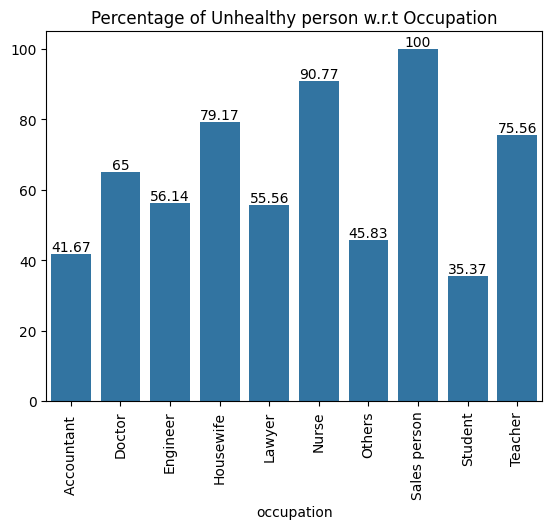

In [47]:
# find out percentage of unhealthy with respect to occupation

unhealthy_occ=df[df['Health status']=='Unhealthy']['occupation'].value_counts().sort_index()
all_occ=df['occupation'].value_counts().sort_index()
percentage=np.round((unhealthy_occ.values / all_occ.values)*100,2)

plt.title('Percentage of Unhealthy person w.r.t Occupation')
ax=sns.barplot(x=unhealthy_occ.index,y=percentage)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.show()

# Output: most people are unhealthy who are Nurse and Sales person

In [48]:
# sleep hour value error handling
sleep_cnt=df['sleep(hours)'].value_counts()
df['sleep(hours)']=df['sleep(hours)'].replace(sleep_cnt[sleep_cnt<2].index,8)

# round data
df['sleep(hours)']=np.floor(df['sleep(hours)'])


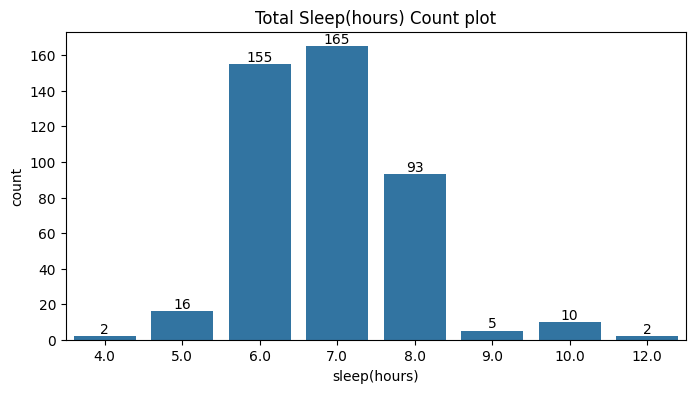

In [75]:
# Sleep(hours) plot
plt.figure(figsize=(8,4))
plt.title("Total Sleep(hours) Count plot")
ax=sns.countplot(df,x='sleep(hours)')
ax.bar_label(ax.containers[0])
plt.show()

In [50]:
# fresh sleep hour
fresh_sleep_cnt=df['fresh sleep(hours)'].value_counts()
df['fresh sleep(hours)']=df['fresh sleep(hours)'].replace(fresh_sleep_cnt[fresh_sleep_cnt<10].index,8)

# round data
df['fresh sleep(hours)']=np.floor(df['fresh sleep(hours)'])
df['fresh sleep(hours)'].value_counts()

fresh sleep(hours)
8.0     186
6.0     100
7.0      77
9.0      65
10.0     20
Name: count, dtype: int64

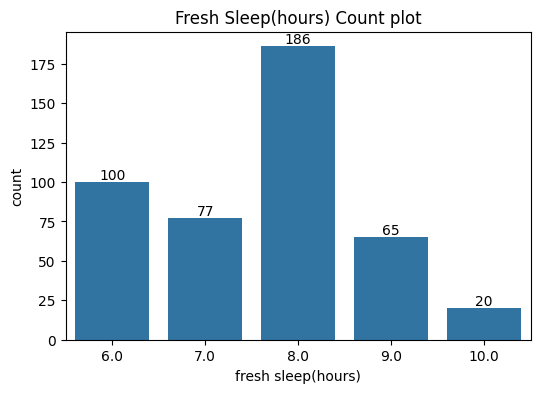

In [74]:
# Fresh Sleep(hours) plot
plt.figure(figsize=(6,4))
plt.title("Fresh Sleep(hours) Count plot")
ax=sns.countplot(df,x='fresh sleep(hours)')
ax.bar_label(ax.containers[0])
plt.show()

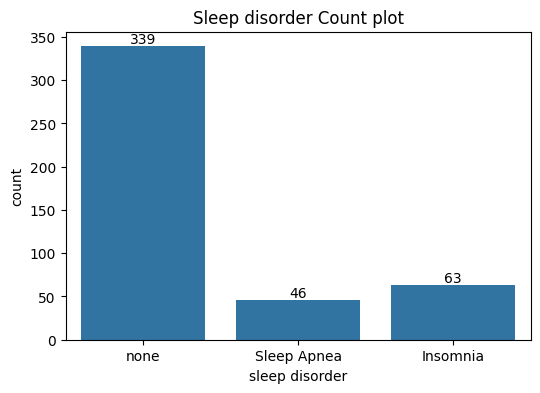

In [73]:
# sleep disorder plot
plt.figure(figsize=(6,4))
plt.title("Sleep disorder Count plot")
ax=sns.countplot(df,x='sleep disorder')
ax.bar_label(ax.containers[0])
plt.show()

In [53]:
# stress level
stress=df['stress level'].value_counts()
df['stress level']=df['stress level'].replace(stress[stress<10].index,'middle')
df['stress level'].value_counts()

stress level
middle         170
very little    138
very high      115
none            25
Name: count, dtype: int64

In [54]:
# blood pressure
df['blood pressure'].value_counts()

blood pressure
unknown          234
High pressure    182
Low pressure      32
Name: count, dtype: int64

In [55]:
#go to sleep time
df['wake up time'].value_counts()

wake up time
Between 8 am and 10 am    217
early morning             208
after 10 am                23
Name: count, dtype: int64

In [56]:
df['sleep disorder'].value_counts()

sleep disorder
none           339
Insomnia        63
Sleep Apnea     46
Name: count, dtype: int64

In [57]:
df['gender'].nunique()

2

# train test split

In [58]:
X=df.iloc[:,:12]
Y=df['Health status']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [61]:
x_test.shape

(90, 12)

# encoding

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [63]:
categories=[['none','very little','middle','very high'],['unknown','Low pressure','High pressure'],['Less than 60','Between 60 and 100','greater than 100'],['after 12am','Within 12am','Within 10 p.m'],['after 10 am','Between 8 am and 10 am','early morning'],['Less weight','Normal','Over weight']]
transformer=ColumnTransformer(transformers=[
  ('tf1',OneHotEncoder(sparse=False,drop='first'),['gender','occupation','sleep disorder']),
  ('tf2',OrdinalEncoder(categories=categories),['stress level','blood pressure','heart rate','go to sleep time','wake up time','BMI'])
]
  , remainder='passthrough'
)

In [64]:
x_train_trans=transformer.fit_transform(x_train)
x_test_trans=transformer.fit_transform(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
x_train_trans.shape

(358, 21)

In [66]:
# y_test encoding
le=LabelEncoder()
le.fit(y_train)
y_train_trans=le.transform(y_train)
y_test_trans=le.transform(y_test)

# Model train

In [85]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [113]:
sgd=SGDClassifier(loss="log_loss")
lr=LogisticRegression(penalty="l1", solver="liblinear")
svm=SVC(kernel="sigmoid", gamma=1.0)
knn=KNeighborsClassifier()
kmeans=KMeans(n_clusters=2)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
bagc=BaggingClassifier(estimator=dt, n_estimators=50,max_samples=50, random_state=2)
rfc=RandomForestClassifier(n_estimators=50,max_samples=50, random_state=2)
abc=AdaBoostClassifier(estimator=dt)
gbc=GradientBoostingClassifier(max_leaf_nodes=8)
vc=VotingClassifier(estimators=[('svm',svm),('knn',knn),('sgd',sgd),('dt',dt)],voting="hard")
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [125]:
clfs={
    "SGD": sgd,
    "LR": lr,
    "SVM": svm,
    "KNN": knn,
    "Kmeans": kmeans,
    "DT": dt,
    "GNB": gnb,
    "MNB": mnb,
    "BNB": bnb,
    "Bagc": bagc,
    "RfC": rfc,
    "AdaBoost": abc,
    "GradientBoost": gbc,
    "VootingC": vc,
    "XGBoost": xgb
}

In [126]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)

  y_pred=clf.predict(x_test)
  accuracy= accuracy_score(y_test, y_pred)
  precision= precision_score(y_test, y_pred)

  return accuracy, precision

In [127]:
accuracy_scores=[]
precision_scores=[]

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train_trans, y_train_trans, x_test_trans, y_test_trans)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
performance_df=pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values("Precision", ascending=False)

performance_df

,Algorithm,Accuracy,Precision
12,GradientBoost,0.977778,0.945946
14,XGBoost,0.977778,0.945946
5,DT,0.933333,0.939394
11,AdaBoost,0.900000,0.906250
9,Bagc,0.955556,0.897436
10,RfC,0.944444,0.875000
1,LR,0.877778,0.852941
8,BNB,0.866667,0.848485
13,VootingC,0.644444,0.800000
3,KNN,0.833333,0.750000
